Nicolas Cardenas Valdez A01114959
Grupo 102
Concentracion Inteligencia Artifical para la Ciencia de Datos

# OVERVIEW

Primero que nada veremos nuestro dataset, es el famoso dataset de iris.cv, que con el, vamos a tratar de predecir que tipo de flor es dependiendo de sus caracteristicas. Tenemos cuatro diferentes aspectos (inputs), entraremos a mas detalle de cada uno de estos a continuacion. Escogi este dataset porque es uno de los mas famosos que se utiliza para este tipo de ejercicios y porque queria uno que tuviera como variable dependiente una variable categorica ya que en nuestro reto principal tambien trabajaremos con una categorica como output. Sin embargo, a diferencia del reto, este tiene estrictamente variables independientes numericas por lo tanto podemos aprender mas cosas de esta actividad.

El objetivo de este documento es no solo encontrar un modelo para predecir el tipo de flor si no tambien comparar diferentes modelos, analizar estos modelos, observar como cambian diferentes metricas y optimizar el modelo con el uso de la optimizacion de hiperparametros.

# LIMPIEZA

In [2]:
#Nicolas Cardenas Valdez A01114959
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv("iris.csv", index_col="Id")
print(data.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
#El CSV no contiene NA pero sigue siendo bueno filtrarlos
data=data.dropna().copy()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [5]:
print(data.duplicated().sum()) #Vemos que hay tres duplicados

3


In [6]:
print(data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


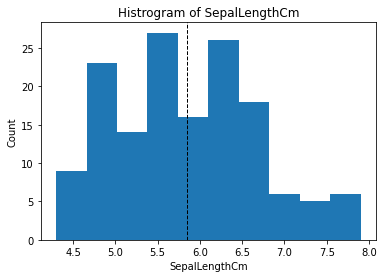

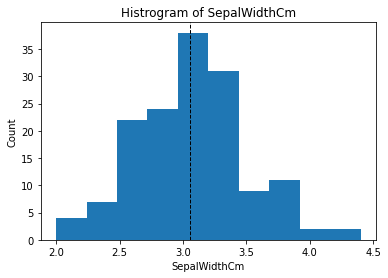

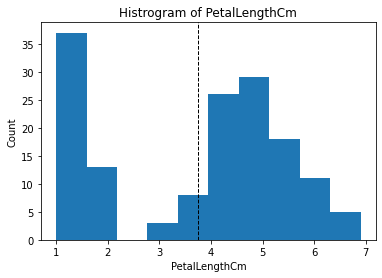

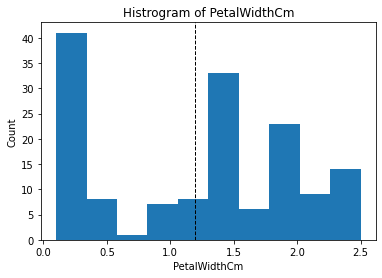

In [7]:
for col in data.columns.tolist()[0:-1]:
    plt.hist(data[[col]])
    plt.axvline(data[col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title('Histrogram of '+col)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


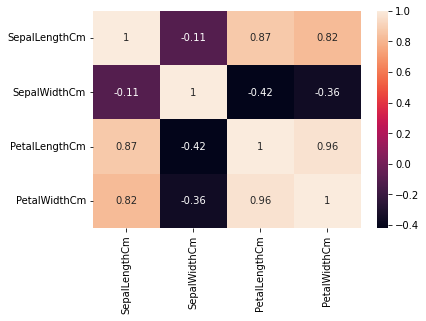

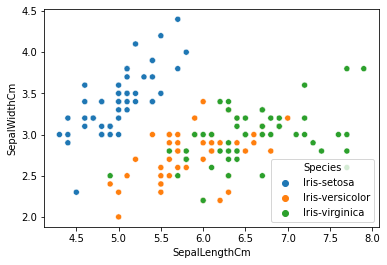

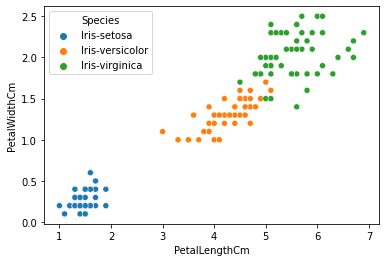

In [8]:
#Podemos ver que hay samples_sizes iguales para cada tipo de especie lo cual es bueno porque mejora nuestra calidad de la 
#informacion
print(data.Species.value_counts())

sns.heatmap(data = data.corr(), annot=True)
plt.show()
#Como podemos ver en el mapa de correlaciones, tenemos unas muy fuertes:
#entre petalwidthcm y sepallengthcm, y sepallengthcm con petallength cm asi que analizaremos estas relaciones

sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, hue = 'Species')
plt.show()

sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = data ,hue ='Species')
plt.show()
#Como podemos ver en cuanto al sepal tenemos mas variabilidad y hay muchos datos revueltos
#En cuanto a petal vemos que hay una clara uniformidad y un comportamiento que en cuanto supen las medidas del petal 
#en ambas direcciones, vemos que tambien cambia el tipo de especie.
#Tiene muy buena agrupacion lo cual indica que nuestro modelo puede llegar a ser muy preciso

In [9]:
#No tenemos variables categoricas independientes que podamos analizar, por lo tanto buenos modelos para considerar seria Regresion Logistica o Decision Tree. Otro modelo que podriamos usar seria K nearest neighbors, sin embargo solo utilizaremos dos modelos para esta comparacion.

# MODELO

## Funcion Accuracy

In [10]:
#Antes de probar modelos haremos una funcion para medir el accuracy score de cada modelo

#Utilizaremos como metricas el accuracy_score y confusion_matrix de parte de la libreria de sklearn 
#ya que estas nos van a dar una idea de que tan preciso es el modelo (a partir de varias otras metricas) y la matriz
#nos ayuda a determinar como se esta equivocando el modelo y cuanto. Podriamos usar el MSE y otras metricas de errores
#pero el accuracy_score toma en consideracion esto de manera indirecta.

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def testModel(model, X, Y):
    x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=0)
    print(model)
    
    predicciones=model.predict(x_train)

    ac = accuracy_score(y_train,predicciones)
    print("Train",ac)

    cm = confusion_matrix(y_train, predicciones) 
    print("Train",cm)
    
    
    predicciones=model.predict(x_test)

    ac = accuracy_score(y_test,predicciones)
    print("Test",ac)

    cm = confusion_matrix(y_test, predicciones) 
    print("Test",cm)

## Variables

In [11]:
#Normalmente hariamos lo siguiente:
#data.join(pd.get_dummies(data.Species,prefix="species-"),how="inner").copy()
#data=data.drop(["Id","Species"],axis=1).copy()

#Sin embargo, lo que queremos decifrar es el tipo de especie, por lo tanto lo tomamos como la variable dependiente
X = data.drop(['Species'], axis = 1)
X.head()

Y = data['Species']

## Training Split

In [12]:
#Agregamos random state para ser consistentes en la comparacion
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

## DecisionTreeClassifier

In [13]:
#Usaremos DecisionTreeClassifier debido a que tenemos variables categoricas, queremos decidir una variable categorica a partir de multiples factores numericos, lo cual es perfecto para un DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Primero probaremos el modelo sin cambiar ningun parametro, solo agregamos random_state para consistencia
modelo = DecisionTreeClassifier(random_state=42)

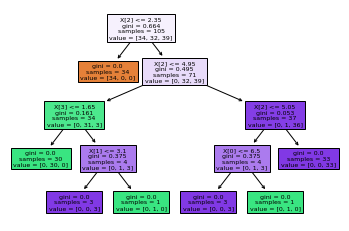

[0.02150464 0.02150464 0.90006666 0.05692405]


In [14]:
modelo.fit(x_train,y_train)
tree.plot_tree(modelo, filled = True)
plt.show()
#Vemos que el arbol muestra muchas decisiones, con samples pequenos

#Primero hay que ver cuales features son las mas importantes para el modelo del modelo pasado:
print(modelo.feature_importances_)
#Vemos que el factor mas importante es la tercera columna que es "petal width" y no toma en consideracion la primera y segundacolumna

In [15]:
testModel(modelo,X,Y)
#Tenemos un excelente accuracy_score lo cual nos indica que nuestro modelo es bueno pero tener 100% en training puede ser preocupante ya que podemos tener un overfit. 

DecisionTreeClassifier(random_state=42)
Train 1.0
Train [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
Test 0.9777777777777777
Test [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


## Regresion Lineal

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(x_train, y_train)

LogisticRegression()

In [17]:
testModel(lr,X,Y)
#La misma accuracy y confusion matrix que el decision tree classifier. Pero Logistic Regression no es tan customizable como DTC entonces procederemos con DTC. Para optimizarlo y debido a que tiene BIAS bajo y varianza ALTA lo cual funciona bien con este dataset en particular.
#Este tiene menos accuracy en el training lo cual puede ser bueno, indicando que no hay overfit.

LogisticRegression()
Train 0.9809523809523809
Train [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Test 0.9777777777777777
Test [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


# Optimizacion

In [18]:
#Vemos que tenemos es un muy buen modelo pero hay que probar si cambiando los hiperparametros podemos mejorar el accuracy_score

#Primero que nada habra que analizar el arbol del modelo pasado lo cual como podemos ver 4 steps son demasiados
#el ultimo paso consiste de muy poco samples por lo mas seguro es que solo nos este quitando accuracy asi que lo limitaremos a 3 
#para generar mejores decisiones, esto es un ejemplo de sobreajuste. Tambien cambiaremos el min_samples_leaf
#para igualmente evitar que no haya decisiones con samples pequenos que creo que nos estan alterando las decisiones
#Como queremos bajar el overfit de nuestro modelo, nos enfocaremos en minsampleleaf y maxdepth para reducir este overfit.
#Agregamos random state para ser consistentes en la comparacion

leaves= {}
for leaf in range(1,16):
    clf = DecisionTreeClassifier(random_state=0, min_samples_leaf = leaf)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    leaves[leaf] = accuracy_score(y_test,y_pred)

#MIN SAMPLE LEAF 4
print(leaves)

depths= {}
for depth in range(1,20):
    clf = DecisionTreeClassifier(random_state=0, min_samples_leaf = 4, max_depth=depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    depths[depth] = accuracy_score(y_test,y_pred)

#DEPTH 3 FOR OPTIMAL
print(depths)

final = DecisionTreeClassifier(random_state=0, min_samples_leaf = 4, max_depth=3)
final.fit(x_train, y_train)

{1: 0.9777777777777777, 2: 0.9777777777777777, 3: 0.9777777777777777, 4: 0.9777777777777777, 5: 0.9111111111111111, 6: 0.9111111111111111, 7: 0.9111111111111111, 8: 0.9111111111111111, 9: 0.9111111111111111, 10: 0.9111111111111111, 11: 0.9111111111111111, 12: 0.9111111111111111, 13: 0.9111111111111111, 14: 0.9111111111111111, 15: 0.9111111111111111}
{1: 0.6, 2: 0.9111111111111111, 3: 0.9777777777777777, 4: 0.9777777777777777, 5: 0.9777777777777777, 6: 0.9777777777777777, 7: 0.9777777777777777, 8: 0.9777777777777777, 9: 0.9777777777777777, 10: 0.9777777777777777, 11: 0.9777777777777777, 12: 0.9777777777777777, 13: 0.9777777777777777, 14: 0.9777777777777777, 15: 0.9777777777777777, 16: 0.9777777777777777, 17: 0.9777777777777777, 18: 0.9777777777777777, 19: 0.9777777777777777}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=0)

In [19]:
#Checamos nuestra nueva accuracy
testModel(final,X,Y)
#Como podemos ver tenemos accuracy en nuestro test al igual que el pasado (el cual es muy bueno), pero parece ser que ya no tenemos overfit de nuestra informacion
#Estamos generalizando mas con estos nuevos parametros y sin perder accuracy en los test lo cual es bueno.

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=0)
Train 0.9809523809523809
Train [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Test 0.9777777777777777
Test [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


[0.         0.         0.42222226 0.57777774]


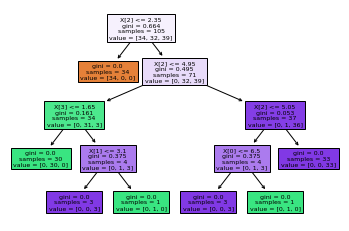

In [20]:
#Checamos de nuevo las importancias
print(final.feature_importances_)
#Vemos que practicamente esta solo considerando las ultimas dos columnas

#Vemos de nuevo el arbol
tree.plot_tree(modelo, filled = True)
plt.show()

#Tenemos un accuracy_score de 97.7%, lo cual un buen numero considerando que no contamos con miles de datos para el entrenamiento.
#Sin embargo esto es para solo el test size

#En conclusion pudimos determinar que modelo a partir de un analisis de varios modelos de machine learning y utilizamos 
# el que mejor que alineo con lo que queriamos realizar (DecisionTreeClasssifier para variables categoricas)
# Asimismo, pudimos armar un modelo base con todos los hiperparametros en default y apartir de lo que pudimos observar del arbol de
#decisiones, poder regularizar esos hiperparametros de entrada para obtener un mejor modelo que no sufre de sobre-ajuste.

# Export

In [21]:
#Export model
from joblib import dump

dump(final, 'final.joblib') 

['final.joblib']